In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## Hypothesis: singleton density is depleted by negative selection 

Negative selection acts in two ways: 

1. it turns doubleton sites into singleton sites, tending to increase the singleton count
2. it turns singleton sites into monomorphic sites, tending to decrease the singleton count 

Current studies focus on point (2), correctly inferring that monomorphic sites must increase in number, or, equivalently, polymorphic sites (singleton, doubleton, tripleton, etc) deplete in response to negative selection. 

We went one step further, and asked for the expected effect on singleton count too. 
Since singleton counts are observed to outnumber doubleton sites in typical allele frequency spectra, 
we reasoned that outflux from the singleton category would exceed its influx, leading to a net decrease in singleton count. In our model, this corresponds to `K_bar < 0`. 

## z-scores for SNV density and singleton density, and eQTL watershed scores, for noncoding trustworthy windows

I used the following script to compute the z-scores that are "common" to Chen et al and McHale et al: 

```
experiments/germline-model/chen-et-al-2022/compute-overlapping-zscores.sh
```

I used the following script to find Chen windows that contain eQTLs and report the watershed score for the corresponding eQTLs: 

```
experiments/germline-model/chen-et-al-2022/add-eQTLs.sh
```

eQTL paper is at: 
https://www.science.org/doi/10.1126/science.aaz5900



In [2]:
import pandas as pd 

def get_chen_mchale_eQTLs():
    CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.eQTL.bed'
    df = pd.read_csv(filename, sep='\t')
    return df

chen_mchale_zscores_eQTLs = get_chen_mchale_eQTLs()
chen_mchale_zscores_eQTLs

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,eQTL_chromosome,eQTL_start,eQTL_end,watershed_posterior
0,chr1,7136000,7137000,0.207664,7136055,7137056,7136555,-0.903840,198,-1.562626,93,198,945,chr1,7136632,7136633,0.000118
1,chr1,7794000,7795000,-3.269982,7794008,7795009,7794508,1.632284,229,0.393647,123,229,992,chr1,7794110,7794111,0.003374
2,chr1,33684000,33685000,-0.749553,33684017,33685018,33684517,0.859720,222,-0.249435,114,222,983,chr1,33684732,33684733,0.000530
3,chr1,59458000,59459000,0.664443,59458077,59459078,59458577,-0.180898,186,1.529238,111,186,923,chr1,59458628,59458629,0.003513
4,chr1,172119000,172120000,-2.285137,172119010,172120011,172119510,0.025463,216,-0.997043,105,216,990,chr1,172119558,172119559,0.000909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,chr9,7163000,7164000,0.031941,7162974,7163975,7163474,1.536845,235,0.332096,125,235,975,chr9,7163381,7163382,0.000344
486,chr9,79579000,79580000,0.262244,79578944,79579945,79579444,-1.933264,171,-1.313034,83,171,945,chr9,79579926,79579927,0.020391
487,chr9,98988000,98989000,0.900368,98987977,98988978,98988477,-2.093506,197,-2.261948,87,197,978,chr9,98988049,98988050,0.002706
488,chr9,115108000,115109000,-1.704081,115108080,115109081,115108580,0.185658,198,1.976223,121,198,920,chr9,115108078,115108079,0.004338


## Collapse duplicate eQTLs and duplicate Chen windows

In [3]:
# duplicate eQTLs: 
chen_mchale_zscores_eQTLs[
    chen_mchale_zscores_eQTLs.duplicated(
        subset=['eQTL_chromosome', 'eQTL_start'], 
        keep=False # Mark all duplicates as True.
    )
]

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,eQTL_chromosome,eQTL_start,eQTL_end,watershed_posterior
18,chr10,69211000,69212000,-1.405275,69210986,69211987,69211486,-1.125426,183,0.106234,99,183,987,chr10,69211728,69211729,0.013622
19,chr10,69211000,69212000,-1.405275,69210986,69211987,69211486,-1.125426,183,0.106234,99,183,987,chr10,69211728,69211729,0.015834
20,chr10,69260000,69261000,-1.176968,69259960,69260961,69260460,-0.958633,183,0.242582,100,183,961,chr10,69260818,69260819,0.009000
21,chr10,69260000,69261000,-1.176968,69259960,69260961,69260460,-0.958633,183,0.242582,100,183,961,chr10,69260818,69260819,0.014882
26,chr11,876000,877000,2.062472,875911,876912,876411,-0.649672,249,-0.407891,123,249,912,chr11,876244,876245,0.010234
27,chr11,876000,877000,2.062472,875911,876912,876411,-0.649672,249,-0.407891,123,249,912,chr11,876244,876245,0.010925
28,chr11,876000,877000,2.062472,875911,876912,876411,-0.649672,249,-0.407891,123,249,912,chr11,876883,876884,0.017654
29,chr11,876000,877000,2.062472,875911,876912,876411,-0.649672,249,-0.407891,123,249,912,chr11,876883,876884,0.017868
32,chr11,10601000,10602000,-0.626421,10601059,10602060,10601559,-0.918561,204,-1.008288,100,204,941,chr11,10601464,10601465,0.001957
33,chr11,10601000,10602000,-0.626421,10601059,10602060,10601559,-0.918561,204,-1.008288,100,204,941,chr11,10601464,10601465,0.002877


In [4]:
# duplicate Chen windows: 
chen_mchale_zscores_eQTLs[
    chen_mchale_zscores_eQTLs.duplicated(
        subset=['chromosome', 'chen_start'], 
        keep=False # Mark all duplicates as True.
    )
]

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,eQTL_chromosome,eQTL_start,eQTL_end,watershed_posterior
18,chr10,69211000,69212000,-1.405275,69210986,69211987,69211486,-1.125426,183,0.106234,99,183,987,chr10,69211728,69211729,0.013622
19,chr10,69211000,69212000,-1.405275,69210986,69211987,69211486,-1.125426,183,0.106234,99,183,987,chr10,69211728,69211729,0.015834
20,chr10,69260000,69261000,-1.176968,69259960,69260961,69260460,-0.958633,183,0.242582,100,183,961,chr10,69260818,69260819,0.009000
21,chr10,69260000,69261000,-1.176968,69259960,69260961,69260460,-0.958633,183,0.242582,100,183,961,chr10,69260818,69260819,0.014882
26,chr11,876000,877000,2.062472,875911,876912,876411,-0.649672,249,-0.407891,123,249,912,chr11,876244,876245,0.010234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,chr9,7080000,7081000,1.447289,7080038,7081039,7080538,3.384584,238,-0.106575,122,238,962,chr9,7080288,7080289,0.003124
480,chr9,7133000,7134000,3.409861,7133086,7134087,7133586,4.143283,259,-1.455106,116,259,914,chr9,7133267,7133268,0.000599
481,chr9,7133000,7134000,3.409861,7133086,7134087,7133586,4.143283,259,-1.455106,116,259,914,chr9,7133720,7133721,0.002365
483,chr9,7161000,7162000,2.532377,7160972,7161973,7161472,5.676977,292,0.288932,149,292,973,chr9,7161413,7161414,0.000460


In [5]:
# collapse duplicate eQTLs first, and then collapse duplicate chen windows: 
watershed_posterior_max_sum_count = (
    chen_mchale_zscores_eQTLs
    .groupby(['chromosome', 'chen_start', 'eQTL_start']) 
    .agg({
        'watershed_posterior': ['max'],
    })
    .groupby(['chromosome', 'chen_start']) 
    .agg({
        ('watershed_posterior', 'max'): ['sum', 'count'],
    })
)
watershed_posterior_max_sum_count

watershed_posterior      
                                      max      
                                      sum count
chromosome chen_start                          
chr1       7136000               0.000118     1
           7794000               0.003374     1
           33684000              0.000530     1
           59458000              0.003513     1
           172119000             0.000909     1
...                                   ...   ...
chr9       7163000               0.000344     1
           79579000              0.020391     1
           98988000              0.002706     1
           115108000             0.004338     1
           124359000             0.002046     1

[340 rows x 2 columns]

In [6]:
chen_mchale_zscores = (
    chen_mchale_zscores_eQTLs
    .drop(['eQTL_chromosome', 'eQTL_start', 'eQTL_end', 'watershed_posterior'], axis=1)
    .drop_duplicates()
)
chen_mchale_zscores

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps
0,chr1,7136000,7137000,0.207664,7136055,7137056,7136555,-0.903840,198,-1.562626,93,198,945
1,chr1,7794000,7795000,-3.269982,7794008,7795009,7794508,1.632284,229,0.393647,123,229,992
2,chr1,33684000,33685000,-0.749553,33684017,33685018,33684517,0.859720,222,-0.249435,114,222,983
3,chr1,59458000,59459000,0.664443,59458077,59459078,59458577,-0.180898,186,1.529238,111,186,923
4,chr1,172119000,172120000,-2.285137,172119010,172120011,172119510,0.025463,216,-0.997043,105,216,990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,chr9,7163000,7164000,0.031941,7162974,7163975,7163474,1.536845,235,0.332096,125,235,975
486,chr9,79579000,79580000,0.262244,79578944,79579945,79579444,-1.933264,171,-1.313034,83,171,945
487,chr9,98988000,98989000,0.900368,98987977,98988978,98988477,-2.093506,197,-2.261948,87,197,978
488,chr9,115108000,115109000,-1.704081,115108080,115109081,115108580,0.185658,198,1.976223,121,198,920


In [7]:
chen_mchale_zscores__watershed_posterior_max_sum_count = ( 
  chen_mchale_zscores
  .merge(watershed_posterior_max_sum_count, on=['chromosome', 'chen_start'], how='inner')
)
chen_mchale_zscores__watershed_posterior_max_sum_count

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,3 on the right)
  return merge(


,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,"(watershed_posterior, max, sum)","(watershed_posterior, max, count)"
0,chr1,7136000,7137000,0.207664,7136055,7137056,7136555,-0.903840,198,-1.562626,93,198,945,0.000118,1
1,chr1,7794000,7795000,-3.269982,7794008,7795009,7794508,1.632284,229,0.393647,123,229,992,0.003374,1
2,chr1,33684000,33685000,-0.749553,33684017,33685018,33684517,0.859720,222,-0.249435,114,222,983,0.000530,1
3,chr1,59458000,59459000,0.664443,59458077,59459078,59458577,-0.180898,186,1.529238,111,186,923,0.003513,1
4,chr1,172119000,172120000,-2.285137,172119010,172120011,172119510,0.025463,216,-0.997043,105,216,990,0.000909,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,chr9,7163000,7164000,0.031941,7162974,7163975,7163474,1.536845,235,0.332096,125,235,975,0.000344,1
336,chr9,79579000,79580000,0.262244,79578944,79579945,79579444,-1.933264,171,-1.313034,83,171,945,0.020391,1
337,chr9,98988000,98989000,0.900368,98987977,98988978,98988477,-2.093506,197,-2.261948,87,197,978,0.002706,1
338,chr9,115108000,115109000,-1.704081,115108080,115109081,115108580,0.185658,198,1.976223,121,198,920,0.004338,1


In [8]:
chen_mchale_zscores__watershed_posterior_max_sum_count['mchale_K_bar'] = pd.to_numeric(chen_mchale_zscores__watershed_posterior_max_sum_count['mchale_K_bar'], errors='coerce')
chen_mchale_zscores__watershed_posterior_max_sum_count = chen_mchale_zscores__watershed_posterior_max_sum_count.dropna()
chen_mchale_zscores__watershed_posterior_max_sum_count.describe()

,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,"(watershed_posterior, max, sum)","(watershed_posterior, max, count)"
count,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,3.400000e+02,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,3.781924e+07,3.782024e+07,-0.599521,3.781924e+07,3.782024e+07,3.781974e+07,1.697060,226.200000,0.020004,117.885294,226.197059,946.420588,0.013958,1.408824
std,5.028627e+07,5.028627e+07,2.197513,5.028628e+07,5.028628e+07,5.028628e+07,3.734298,50.362942,0.998355,25.840590,50.363452,29.927881,0.070607,0.859055
min,7.080000e+05,7.090000e+05,-9.573203,7.080410e+05,7.090420e+05,7.085410e+05,-4.217398,138.000000,-2.843580,66.000000,138.000000,901.000000,0.000003,1.000000
25%,4.162500e+06,4.163500e+06,-1.725328,4.162449e+06,4.163450e+06,4.162949e+06,-1.129938,186.750000,-0.579633,98.000000,186.750000,918.000000,0.000761,1.000000
50%,6.995500e+06,6.996500e+06,-0.458267,6.995503e+06,6.996504e+06,6.996003e+06,0.519919,211.000000,0.042647,112.000000,211.000000,945.500000,0.002675,1.000000
75%,6.760400e+07,6.760500e+07,0.763905,6.760405e+07,6.760505e+07,6.760455e+07,4.130528,259.500000,0.694580,135.250000,259.500000,971.250000,0.009023,1.250000
max,2.331450e+08,2.331460e+08,5.192389,2.331451e+08,2.331461e+08,2.331456e+08,14.474436,425.000000,2.858140,207.000000,425.000000,999.000000,1.025958,6.000000


In [9]:
import numpy as np 

chen_mchale_zscores__watershed_posterior_max_sum_count['watershed_posterior_max_sum_log'] = (
    np.log10(chen_mchale_zscores__watershed_posterior_max_sum_count[('watershed_posterior', 'max', 'sum')])
)
chen_mchale_zscores__watershed_posterior_max_sum_count

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,"(watershed_posterior, max, sum)","(watershed_posterior, max, count)",watershed_posterior_max_sum_log
0,chr1,7136000,7137000,0.207664,7136055,7137056,7136555,-0.903840,198,-1.562626,93,198,945,0.000118,1,-3.929220
1,chr1,7794000,7795000,-3.269982,7794008,7795009,7794508,1.632284,229,0.393647,123,229,992,0.003374,1,-2.471834
2,chr1,33684000,33685000,-0.749553,33684017,33685018,33684517,0.859720,222,-0.249435,114,222,983,0.000530,1,-3.275549
3,chr1,59458000,59459000,0.664443,59458077,59459078,59458577,-0.180898,186,1.529238,111,186,923,0.003513,1,-2.454261
4,chr1,172119000,172120000,-2.285137,172119010,172120011,172119510,0.025463,216,-0.997043,105,216,990,0.000909,1,-3.041462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,chr9,7163000,7164000,0.031941,7162974,7163975,7163474,1.536845,235,0.332096,125,235,975,0.000344,1,-3.463892
336,chr9,79579000,79580000,0.262244,79578944,79579945,79579444,-1.933264,171,-1.313034,83,171,945,0.020391,1,-1.690567
337,chr9,98988000,98989000,0.900368,98987977,98988978,98988477,-2.093506,197,-2.261948,87,197,978,0.002706,1,-2.567712
338,chr9,115108000,115109000,-1.704081,115108080,115109081,115108580,0.185658,198,1.976223,121,198,920,0.004338,1,-2.362673


## There is no correlation between any of the zscores and a computational measure of eQTL impact on the transcriptome

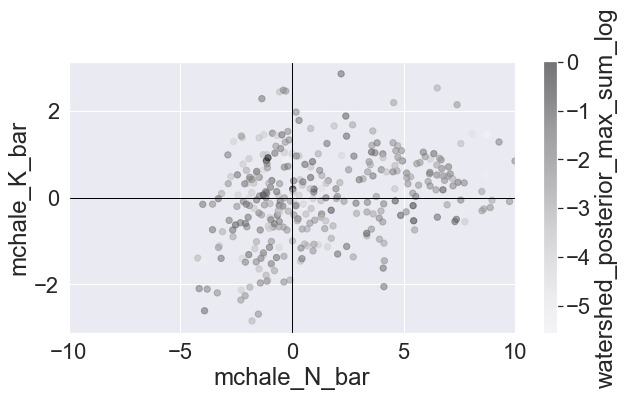

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set(font_scale = 2)

def scatter_plot(x, y, color, step_size=1): 
    df = chen_mchale_zscores__watershed_posterior_max_sum_count.iloc[::step_size, :]
     
    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,5))

    axis = df.plot.scatter(
        x = x,
        y = y,
        c = color,
        s = 40,
        alpha = 0.5,
        ax = axis,
#         cmap = 'BrBG',         
    )

    axis.set_xlim(-10, 10)
#     axis.set_ylim(-10, 10)
#     plt.legend()
    
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')

    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')

scatter_plot(
    x='mchale_N_bar',
    y='mchale_K_bar',
    color='watershed_posterior_max_sum_log'
#     color=('watershed_posterior', 'max', 'sum')
)

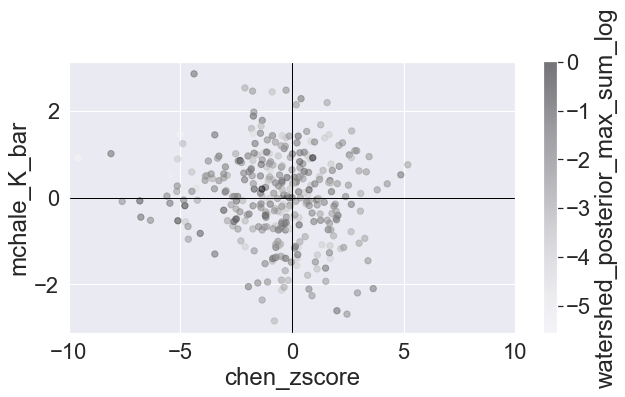

In [11]:
scatter_plot(
    x='chen_zscore',
    y='mchale_K_bar',
    color='watershed_posterior_max_sum_log'
#     color=('watershed_posterior', 'max', 'sum')    
)

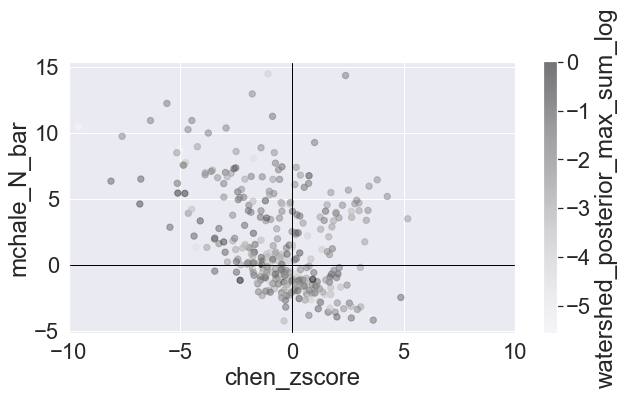

In [12]:
scatter_plot(
    x='chen_zscore',
    y='mchale_N_bar',
    color='watershed_posterior_max_sum_log'
#     color=('watershed_posterior', 'max', 'sum')    
)

In [13]:
chen_mchale_zscores__watershed_posterior_max_sum_count['mchale_negative_N_bar'] = -chen_mchale_zscores__watershed_posterior_max_sum_count['mchale_N_bar']
chen_mchale_zscores__watershed_posterior_max_sum_count['mchale_negative_K_bar'] = -chen_mchale_zscores__watershed_posterior_max_sum_count['mchale_K_bar']

In [14]:
def compute_meanWatershedPosterior_vs_quantile(score, number_of_quantiles): 
    chen_mchale_zscores__watershed_posterior_max_sum_count[f'{score}_quantile'] = pd.qcut(
        chen_mchale_zscores__watershed_posterior_max_sum_count[score], 
        number_of_quantiles, 
        labels=False
    )

    groups = chen_mchale_zscores__watershed_posterior_max_sum_count.groupby([f'{score}_quantile'])
    aggregated = groups.agg({
        'watershed_posterior_max_sum_log': ['mean', 'std'],
    })

    quantiles = np.array(aggregated.index)

    means = np.array(aggregated['watershed_posterior_max_sum_log']['mean'])
    stds = np.array(aggregated['watershed_posterior_max_sum_log']['std'])
    means_minus_stds = means - stds
    means_plus_stds = means + stds    
    
    return quantiles, means, means_minus_stds, means_plus_stds 

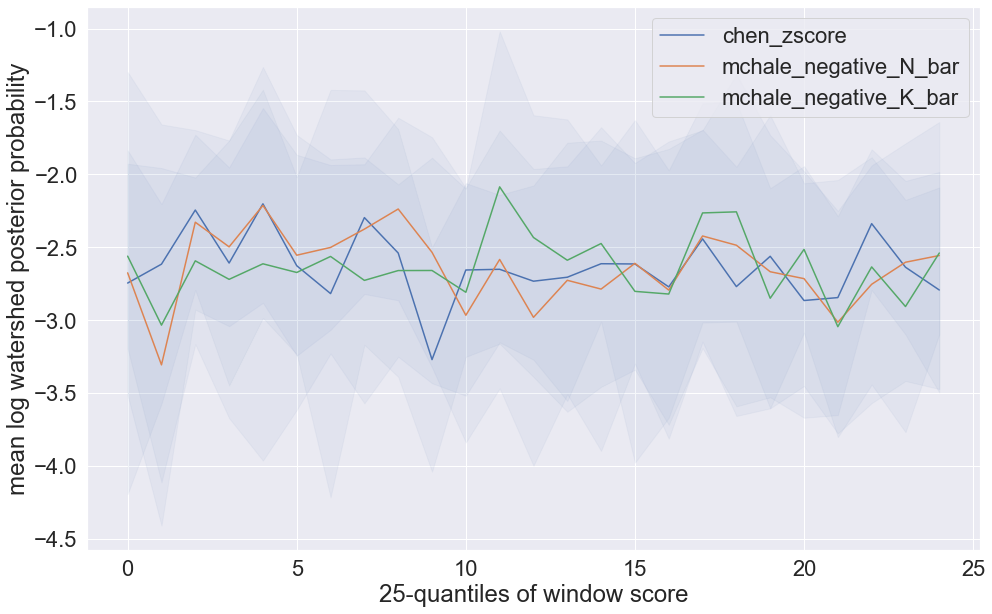

In [15]:
sns.set(font_scale = 2)
fig, axis = plt.subplots(figsize=(16,10))

number_of_quantiles = 25

for score in [
    'chen_zscore',
    'mchale_negative_N_bar',
    'mchale_negative_K_bar',
]: 
    quantiles, means, means_minus_stds, means_plus_stds = compute_meanWatershedPosterior_vs_quantile(score, number_of_quantiles)
    axis.plot(quantiles, means, label=score)
    axis.fill_between(quantiles, means_minus_stds, means_plus_stds, color='b', alpha=.05)

axis.set_xlabel(f'{number_of_quantiles}-quantiles of window score')
axis.set_ylabel('mean log watershed posterior probability')    
# axis.set_ylim(top=0)
axis.legend()
